In [249]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# MALAYSIA

In [4]:
df_malay = pd.read_csv('malaysia.csv')
df_malay

,Category,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.13,25.17,NaN
1,1902,25.12,25.11,NaN
2,1903,25.07,25.07,NaN
3,1904,25.01,25.03,NaN
4,1905,25.10,25.01,NaN
...,...,...,...,...
115,2016,26.30,26.02,7.451282
116,2017,25.85,26.04,7.165808
117,2018,25.89,26.05,7.600220
118,2019,26.17,26.05,NaN


In [5]:
#ubah nama kolom Category menjadi Year
df_malay.rename(columns={'Category':'Year'}, inplace=True)
df_malay

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.13,25.17,NaN
1,1902,25.12,25.11,NaN
2,1903,25.07,25.07,NaN
3,1904,25.01,25.03,NaN
4,1905,25.10,25.01,NaN
...,...,...,...,...
115,2016,26.30,26.02,7.451282
116,2017,25.85,26.04,7.165808
117,2018,25.89,26.05,7.600220
118,2019,26.17,26.05,NaN


In [6]:
#select year 2014-2018
df_year_malay = df_malay[113:118]
df_year_malay

,Year,Annual Mean,5-yr smooth,CO2 Emission
113,2014,25.78,25.92,7.757159
114,2015,26.01,25.98,7.682279
115,2016,26.30,26.02,7.451282
116,2017,25.85,26.04,7.165808
117,2018,25.89,26.05,7.600220


In [7]:
df_malay.isnull().sum()

Year             0
Annual Mean      0
5-yr smooth      0
CO2 Emission    61
dtype: int64

In [8]:
df_malay.dropna(inplace=True)

In [9]:
df_malay.shape

(59, 4)

### Cek Outlier

In [10]:
#melihat outlier
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [11]:
#cek outlier kolom CO2 Emission
detect_outliers(df_year_malay,'CO2 Emission')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [12]:
#cek outlier kolom Annual Mean
detect_outliers(df_year_malay,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission
115,2016,26.3,26.02,7.451282


In [13]:
#hapus data outlier dari kolom Annual Mean
df_year_malay = df_year_malay.replace((df_year_malay[df_year_malay['Annual Mean']>26.1]).values, df_year_malay['Annual Mean'].mean())

In [14]:
#cek outlier kolom Annual Mean
detect_outliers(df_year_malay,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [15]:
X = df_malay.iloc[:,2]
y = df_malay.iloc[:,3]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [61]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("X valid shape: ", X_valid.shape)

X train shape:  (41,)
X test shape:  (21,)
X valid shape:  (20,)


In [62]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

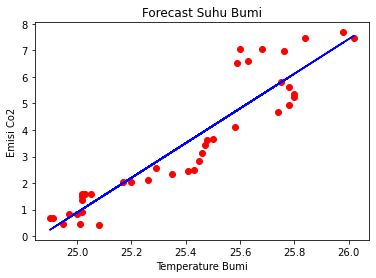

In [63]:
plt.scatter(X_train.values.reshape(-1, 1), y_train, color='red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Forecast Suhu Bumi')
plt.xlabel('Temperature Bumi')
plt.ylabel('Emisi Co2')
plt.show()

In [59]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='softmax'))

In [60]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - 

Epoch 57/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.00

In [64]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 0.79
Residual sum of squares (MSE): 0.92
R2-score: 0.81


# THAILAND

In [141]:
df_thai = pd.read_csv('thailand.csv')
df_thai

,Category,Annual Mean,5-yr smooth,CO2 Emission
0,1901,26.54,26.38,NaN
1,1902,26.45,26.42,NaN
2,1903,26.14,26.46,NaN
3,1904,25.99,26.48,NaN
4,1905,27.05,26.50,NaN
...,...,...,...,...
115,2016,27.37,27.09,3.780122
116,2017,26.87,27.15,3.766229
117,2018,26.86,27.21,3.714039
118,2019,27.47,27.26,NaN


In [142]:
#ubah nama kolom Category menjadi Year
df_thai.rename(columns={'Category':'Year'}, inplace=True)
df_thai

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,26.54,26.38,NaN
1,1902,26.45,26.42,NaN
2,1903,26.14,26.46,NaN
3,1904,25.99,26.48,NaN
4,1905,27.05,26.50,NaN
...,...,...,...,...
115,2016,27.37,27.09,3.780122
116,2017,26.87,27.15,3.766229
117,2018,26.86,27.21,3.714039
118,2019,27.47,27.26,NaN


### Cek Outlier

In [143]:
#melihat outlier
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [144]:
#cek outlier kolom 5-yr smooth
detect_outliers(df_thai,'5-yr smooth')

,Year,Annual Mean,5-yr smooth,CO2 Emission
118,2019,27.47,27.26,NaN
119,2020,27.37,27.31,NaN


In [145]:
#hapus data outlier dari kolom CO2 Emission
df_thai = df_thai.replace((df_thai[df_thai['5-yr smooth']>27.2]).values, df_thai['5-yr smooth'].min())

In [146]:
#cek outlier kolom 5-yr smooth
detect_outliers(df_thai,'5-yr smooth')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [147]:
#cek outlier kolom CO2 Emission
detect_outliers(df_thai,'CO2 Emission')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [148]:
df_thai.isnull().sum()

Year            0
Annual Mean     0
5-yr smooth     0
CO2 Emission    0
dtype: int64

In [149]:
X_thai = df_thai.iloc[:,2]
y_thai = df_thai.iloc[:,3]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_thai,y_thai,test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [151]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("X valid shape: ", X_valid.shape)

X train shape:  (84,)
X test shape:  (42,)
X valid shape:  (42,)


In [154]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [14]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_thai, y_thai)

c:\users\auviera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\auviera\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


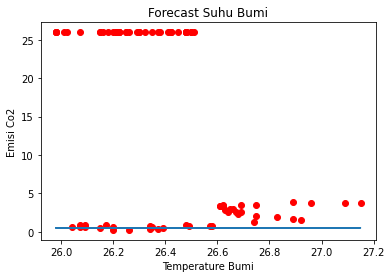

In [157]:
x = X_train/max(X_train)
y = sigmoid(x, *popt)

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y)
plt.title('Forecast Suhu Bumi')
plt.xlabel('Temperature Bumi')
plt.ylabel('Emisi Co2')
plt.show()

In [17]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='softmax'))

In [18]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1/1 [==============================] - 0s 427ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00

Epoch 57/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.00

In [158]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 8.36
Residual sum of squares (MSE): 90.85
R2-score: -1.85


# THAILAND

In [20]:
indo = pd.read_csv('indonesia.csv')

In [21]:
indo

,Category,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.59,25.60,NaN
1,1902,25.56,25.58,NaN
2,1903,25.57,25.56,NaN
3,1904,25.55,25.54,NaN
4,1905,25.60,25.54,NaN
...,...,...,...,...
115,2016,26.42,26.31,1.892441
116,2017,26.22,26.32,2.013671
117,2018,26.23,26.33,2.178462
118,2019,26.39,26.34,NaN


In [22]:
indo.rename(columns={'Category':'Year'}, inplace=True)
indo

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.59,25.60,NaN
1,1902,25.56,25.58,NaN
2,1903,25.57,25.56,NaN
3,1904,25.55,25.54,NaN
4,1905,25.60,25.54,NaN
...,...,...,...,...
115,2016,26.42,26.31,1.892441
116,2017,26.22,26.32,2.013671
117,2018,26.23,26.33,2.178462
118,2019,26.39,26.34,NaN


In [23]:
indo[0:10]

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.59,25.60,NaN
1,1902,25.56,25.58,NaN
2,1903,25.57,25.56,NaN
3,1904,25.55,25.54,NaN
4,1905,25.60,25.54,NaN
5,1906,25.60,25.55,NaN
6,1907,25.53,25.57,NaN
7,1908,25.59,25.60,NaN
8,1909,25.58,25.64,NaN
9,1910,25.57,25.68,NaN


(array([ 8., 28., 23., 20.,  6., 13.,  8.,  4.,  6.,  4.]),
 array([25.45 , 25.547, 25.644, 25.741, 25.838, 25.935, 26.032, 26.129,
        26.226, 26.323, 26.42 ]),
 <BarContainer object of 10 artists>)

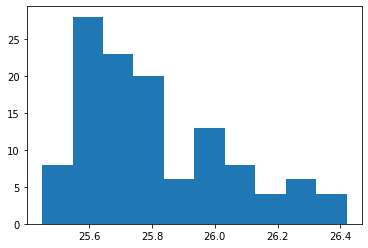

In [24]:
am = indo["Annual Mean"]
plt.hist(am)

In [25]:
year = indo["Year"]
am = indo["Annual Mean"]
smooth = indo["5-yr smooth"]
emission = indo ["CO2 Emission"]

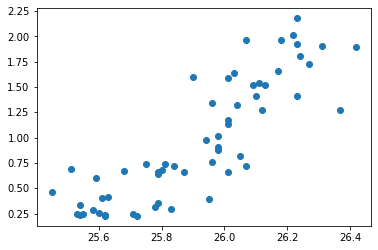

In [26]:
plt.scatter(am, emission)

In [27]:
indo.tail(5)

,Year,Annual Mean,5-yr smooth,CO2 Emission
115,2016,26.42,26.31,1.892441
116,2017,26.22,26.32,2.013671
117,2018,26.23,26.33,2.178462
118,2019,26.39,26.34,NaN
119,2020,26.38,26.34,NaN


In [28]:
print(indo.dtypes)

Year              int64
Annual Mean     float64
5-yr smooth     float64
CO2 Emission    float64
dtype: object


In [29]:
indo.count

<bound method DataFrame.count of      Year  Annual Mean  5-yr smooth  CO2 Emission
0    1901        25.59        25.60           NaN
1    1902        25.56        25.58           NaN
2    1903        25.57        25.56           NaN
3    1904        25.55        25.54           NaN
4    1905        25.60        25.54           NaN
..    ...          ...          ...           ...
115  2016        26.42        26.31      1.892441
116  2017        26.22        26.32      2.013671
117  2018        26.23        26.33      2.178462
118  2019        26.39        26.34           NaN
119  2020        26.38        26.34           NaN

[120 rows x 4 columns]>

In [30]:
indo["Annual Mean"].tail(5)

115    26.42
116    26.22
117    26.23
118    26.39
119    26.38
Name: Annual Mean, dtype: float64

In [31]:
indo.corr()

,Year,Annual Mean,5-yr smooth,CO2 Emission
Year,1.000000,0.740380,0.815462,0.981846
Annual Mean,0.740380,1.000000,0.909506,0.853085
5-yr smooth,0.815462,0.909506,1.000000,0.958118
CO2 Emission,0.981846,0.853085,0.958118,1.000000


In [32]:
indo[["Annual Mean", "CO2 Emission"]].corr()

,Annual Mean,CO2 Emission
Annual Mean,1.000000,0.853085
CO2 Emission,0.853085,1.000000


In [33]:
indo.describe

<bound method NDFrame.describe of      Year  Annual Mean  5-yr smooth  CO2 Emission
0    1901        25.59        25.60           NaN
1    1902        25.56        25.58           NaN
2    1903        25.57        25.56           NaN
3    1904        25.55        25.54           NaN
4    1905        25.60        25.54           NaN
..    ...          ...          ...           ...
115  2016        26.42        26.31      1.892441
116  2017        26.22        26.32      2.013671
117  2018        26.23        26.33      2.178462
118  2019        26.39        26.34           NaN
119  2020        26.38        26.34           NaN

[120 rows x 4 columns]>

In [34]:
indo.describe(include="all")

,Year,Annual Mean,5-yr smooth,CO2 Emission
count,120.000000,120.000000,120.000000,59.000000
mean,1960.500000,25.809417,25.809417,0.973702
std,34.785054,0.231267,0.210347,0.596164
min,1901.000000,25.450000,25.540000,0.227084
25%,1930.750000,25.627500,25.677500,0.407617
50%,1960.500000,25.750000,25.720000,0.755317
75%,1990.250000,25.980000,25.952500,1.522106
max,2020.000000,26.420000,26.340000,2.178462


In [35]:
indo["Annual Mean"].mean()

25.809416666666667

In [36]:
indo["Annual Mean"].value_counts()

25.75    8
25.74    5
26.01    5
25.57    4
25.60    4
        ..
25.56    1
25.88    1
25.48    1
25.76    1
26.38    1
Name: Annual Mean, Length: 61, dtype: int64

In [37]:
indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          120 non-null    int64  
 1   Annual Mean   120 non-null    float64
 2   5-yr smooth   120 non-null    float64
 3   CO2 Emission  59 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.9 KB


In [38]:
indo.isnull()

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
115,False,False,False,False
116,False,False,False,False
117,False,False,False,False
118,False,False,False,True


In [39]:
indo.dropna(inplace=True)

In [40]:
indo.shape

(59, 4)

Visualisasi Awal

Text(0.5, 1.0, 'General Statistics of Indonesia Dataset')

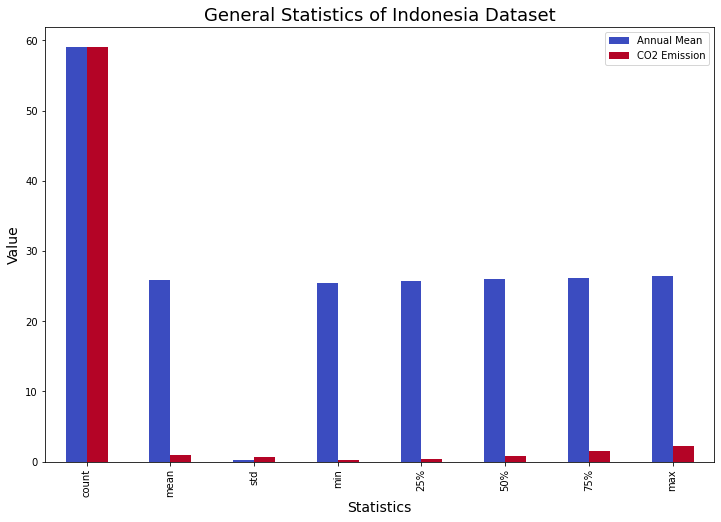

In [41]:
indo[["Annual Mean", "CO2 Emission"]].describe().plot(kind = 'bar', figsize = (12,8), colormap='coolwarm')
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Indonesia Dataset",fontsize=18)

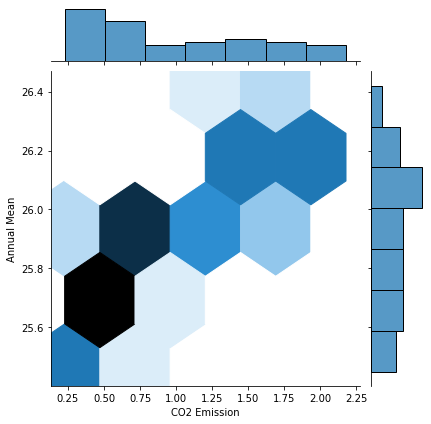

In [43]:
import seaborn as sns

sns.jointplot(x='CO2 Emission',y='Annual Mean',kind='hex', data=indo)

c:\users\auviera\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


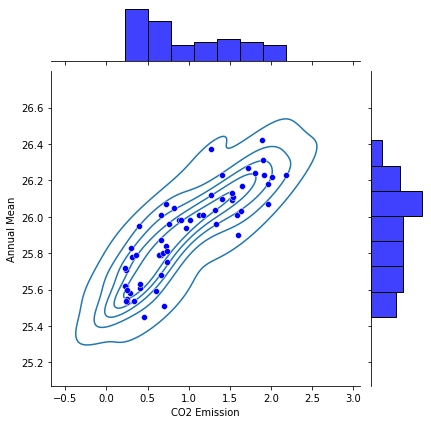

In [44]:
sns.jointplot("CO2 Emission", "Annual Mean",data=indo, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

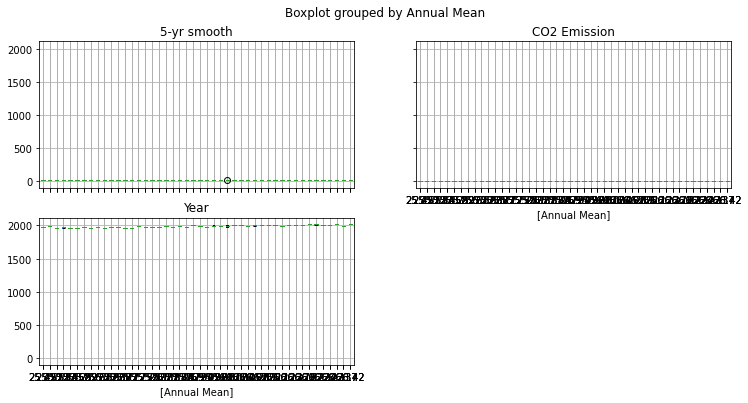

In [45]:
indo.boxplot(by="Annual Mean", figsize=(12, 6))
pass

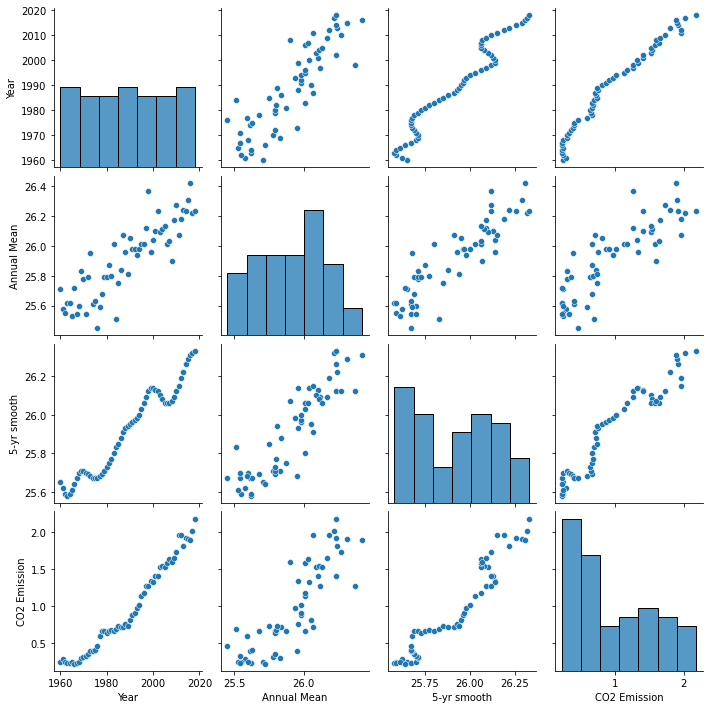

In [46]:
sns.pairplot(data=indo,kind='scatter')

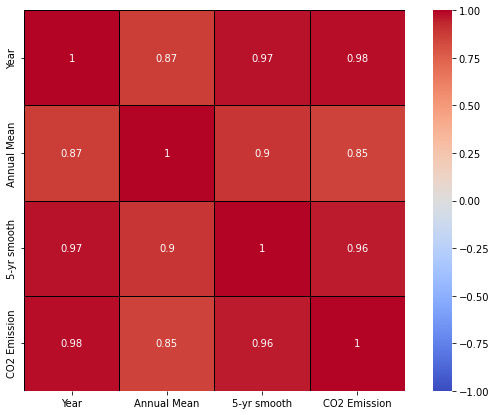

In [47]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(indo.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

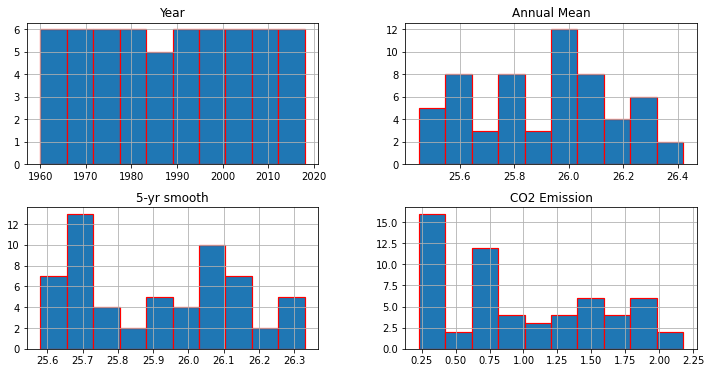

In [48]:
indo.hist(edgecolor='red', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

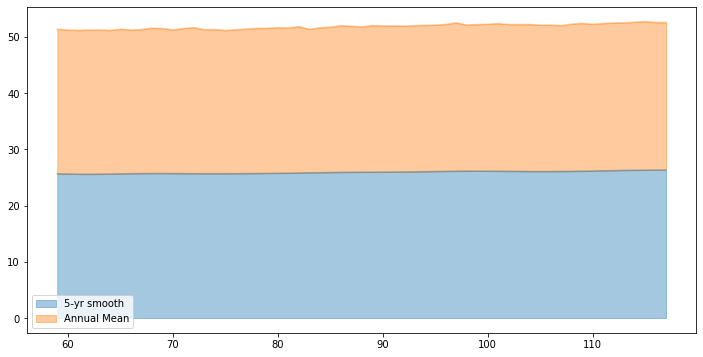

In [49]:
indo.plot.area(y=['5-yr smooth','Annual Mean'],alpha=0.4,figsize=(12, 6));

c:\users\auviera\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


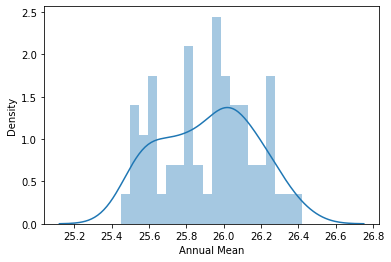

In [50]:
sns.distplot(indo['Annual Mean'],kde=True,bins=20);

Cek Outlier

In [53]:
#select year 2014-2018
indo_year = indo

In [51]:
#melihat outlier
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [54]:
#cek outlier kolom CO2 Emission
detect_outliers(indo_year,'CO2 Emission')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [55]:
#cek outlier kolom Annual Mean
detect_outliers(indo_year,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [56]:
#hapus data outlier dari kolom Annual Mean
indo_year = indo_year.replace((indo_year[indo_year['Annual Mean']>26.4]).values, indo_year['Annual Mean'].mean())

In [57]:
#cek outlier kolom Annual Mean
detect_outliers(indo_year,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [58]:
X = indo_year.iloc[:,2]
y = indo_year.iloc[:,3]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [60]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("X valid shape: ", X_valid.shape)

X train shape:  (41,)
X test shape:  (21,)
X valid shape:  (20,)


In [61]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

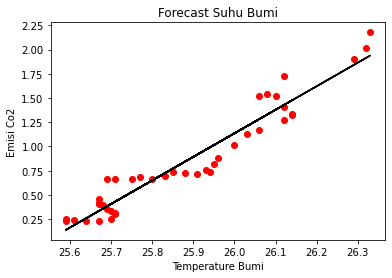

In [62]:
plt.scatter(X_train.values.reshape(-1, 1), y_train, color='red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color='black')
plt.title('Forecast Suhu Bumi')
plt.xlabel('Temperature Bumi')
plt.ylabel('Emisi Co2')
plt.show()

In [63]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 0.13
Residual sum of squares (MSE): 0.02
R2-score: 0.91


In [64]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='softmax'))

In [65]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00

Epoch 57/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.00

# Myanmar

In [103]:
myanmar = pd.read_csv('myanmar.csv')

In [104]:
myanmar

,Category,Annual Mean,5-yr smooth,CO2 Emission
0,1901,23.12,22.97,NaN
1,1902,22.87,22.96,NaN
2,1903,22.95,22.94,NaN
3,1904,22.74,22.93,NaN
4,1905,22.79,22.92,NaN
...,...,...,...,...
115,2016,23.75,23.50,0.412667
116,2017,23.53,23.54,0.588208
117,2018,23.29,23.59,0.605493
118,2019,23.84,23.65,NaN


In [105]:
myanmar.rename(columns={'Category':'Year'}, inplace=True)
myanmar

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,23.12,22.97,NaN
1,1902,22.87,22.96,NaN
2,1903,22.95,22.94,NaN
3,1904,22.74,22.93,NaN
4,1905,22.79,22.92,NaN
...,...,...,...,...
115,2016,23.75,23.50,0.412667
116,2017,23.53,23.54,0.588208
117,2018,23.29,23.59,0.605493
118,2019,23.84,23.65,NaN


(array([ 2., 13., 21., 22., 19., 23., 13.,  2.,  4.,  1.]),
 array([22.49 , 22.645, 22.8  , 22.955, 23.11 , 23.265, 23.42 , 23.575,
        23.73 , 23.885, 24.04 ]),
 <BarContainer object of 10 artists>)

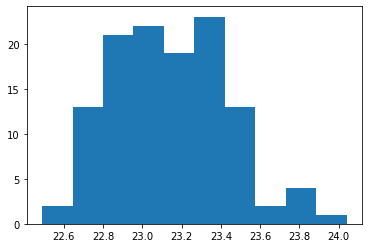

In [106]:
am = myanmar["Annual Mean"]
plt.hist(am)

In [107]:
year = myanmar["Year"]
am = myanmar["Annual Mean"]
smooth = myanmar["5-yr smooth"]
emission = myanmar ["CO2 Emission"]

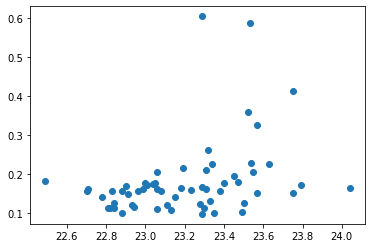

In [108]:
plt.scatter(am, emission)

In [109]:
print(myanmar.dtypes)

Year              int64
Annual Mean     float64
5-yr smooth     float64
CO2 Emission    float64
dtype: object


In [110]:
myanmar.count

<bound method DataFrame.count of      Year  Annual Mean  5-yr smooth  CO2 Emission
0    1901        23.12        22.97           NaN
1    1902        22.87        22.96           NaN
2    1903        22.95        22.94           NaN
3    1904        22.74        22.93           NaN
4    1905        22.79        22.92           NaN
..    ...          ...          ...           ...
115  2016        23.75        23.50      0.412667
116  2017        23.53        23.54      0.588208
117  2018        23.29        23.59      0.605493
118  2019        23.84        23.65           NaN
119  2020        23.68        23.72           NaN

[120 rows x 4 columns]>

In [111]:
myanmar[["Annual Mean", "CO2 Emission"]].corr()

,Annual Mean,CO2 Emission
Annual Mean,1.000000,0.337719
CO2 Emission,0.337719,1.000000


In [112]:
myanmar.describe

<bound method NDFrame.describe of      Year  Annual Mean  5-yr smooth  CO2 Emission
0    1901        23.12        22.97           NaN
1    1902        22.87        22.96           NaN
2    1903        22.95        22.94           NaN
3    1904        22.74        22.93           NaN
4    1905        22.79        22.92           NaN
..    ...          ...          ...           ...
115  2016        23.75        23.50      0.412667
116  2017        23.53        23.54      0.588208
117  2018        23.29        23.59      0.605493
118  2019        23.84        23.65           NaN
119  2020        23.68        23.72           NaN

[120 rows x 4 columns]>

In [113]:
myanmar["Annual Mean"].mean()

23.1375

In [114]:
myanmar["Annual Mean"].value_counts()

23.29    5
23.12    4
23.00    4
22.78    4
22.88    3
        ..
22.49    1
23.01    1
23.15    1
22.70    1
23.68    1
Name: Annual Mean, Length: 75, dtype: int64

In [115]:
myanmar.isnull().sum()

Year             0
Annual Mean      0
5-yr smooth      0
CO2 Emission    61
dtype: int64

In [116]:
myanmar.dropna(inplace=True)

In [117]:
myanmar.shape

(59, 4)

Visualisasi Awal

Text(0.5, 1.0, 'General Statistics of Myanmar Dataset')

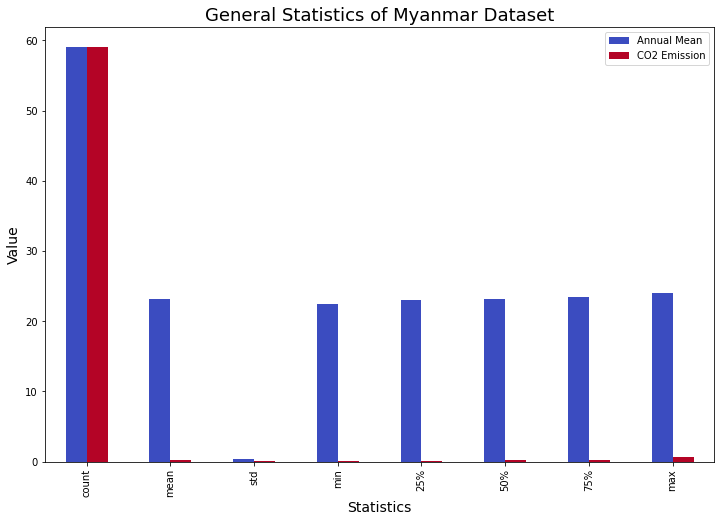

In [118]:
myanmar[["Annual Mean", "CO2 Emission"]].describe().plot(kind = 'bar', figsize = (12,8), colormap='coolwarm')
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Myanmar Dataset",fontsize=18)

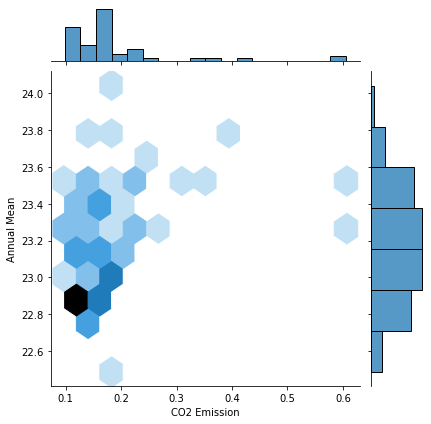

In [119]:
sns.jointplot(x='CO2 Emission',y='Annual Mean',kind='hex', data=myanmar)

c:\users\auviera\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


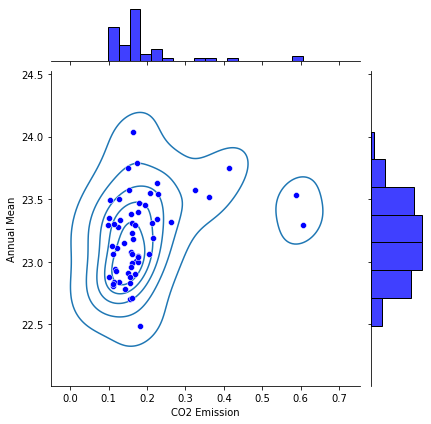

In [120]:
sns.jointplot("CO2 Emission", "Annual Mean",data=myanmar, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

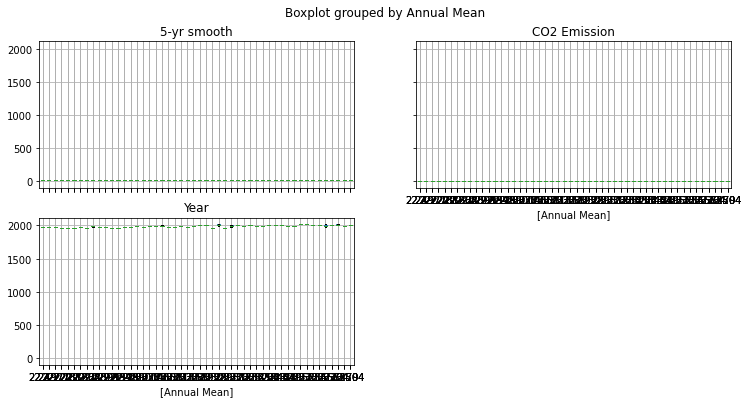

In [121]:
myanmar.boxplot(by="Annual Mean", figsize=(12, 6))
pass

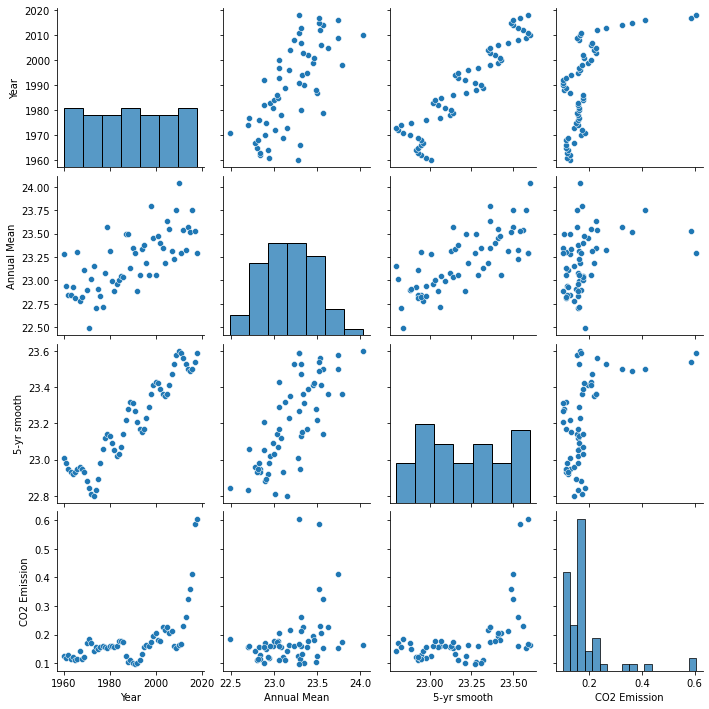

In [122]:
sns.pairplot(data=myanmar,kind='scatter')

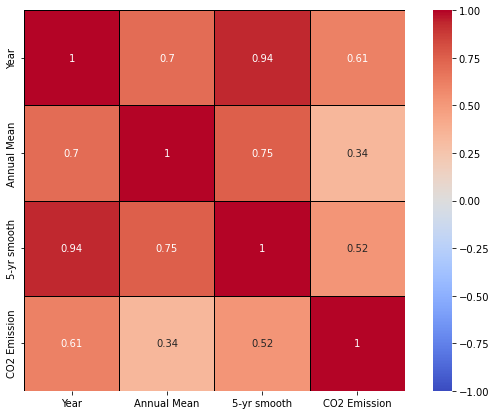

In [123]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(myanmar.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

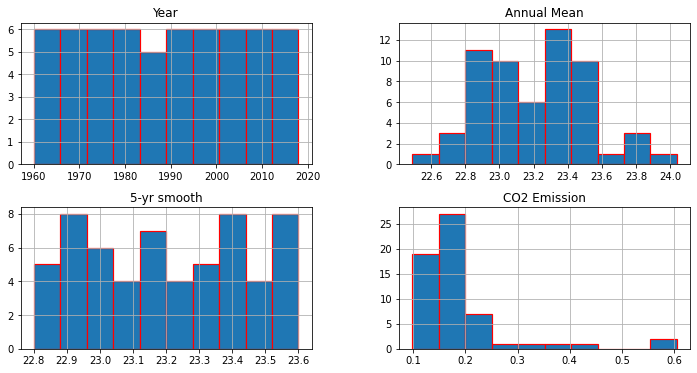

In [124]:
myanmar.hist(edgecolor='red', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

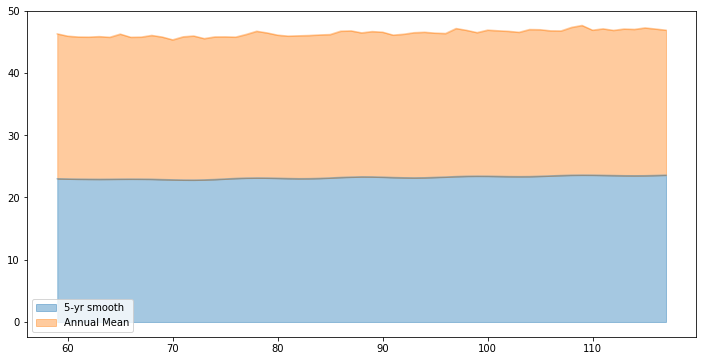

In [125]:
myanmar.plot.area(y=['5-yr smooth','Annual Mean'],alpha=0.4,figsize=(12, 6));

c:\users\auviera\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


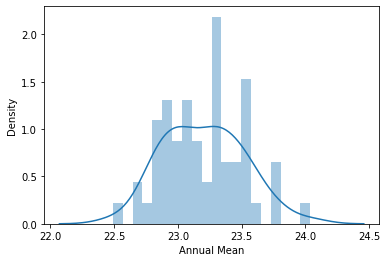

In [126]:
sns.distplot(myanmar['Annual Mean'],kde=True,bins=20);

Cek Outlier

In [127]:
#select year 2014-2018
myanmar_year = myanmar

In [128]:
#melihat outlier
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [129]:
#cek outlier kolom CO2 Emission
detect_outliers(myanmar_year,'CO2 Emission')

,Year,Annual Mean,5-yr smooth,CO2 Emission
113,2014,23.57,23.50,0.325932
114,2015,23.52,23.49,0.360853
115,2016,23.75,23.50,0.412667
116,2017,23.53,23.54,0.588208
117,2018,23.29,23.59,0.605493


In [130]:
#cek outlier kolom Annual Mean
detect_outliers(myanmar_year,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [131]:
#hapus data outlier dari kolom Annual Mean
myanmar_year = myanmar_year.replace((myanmar_year[myanmar_year['Annual Mean']>24]).values, myanmar_year['Annual Mean'].mean())

In [132]:
#cek outlier kolom Annual Mean
detect_outliers(myanmar_year,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [133]:
X = myanmar_year.iloc[:,2]
y = myanmar_year.iloc[:,3]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [135]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("X valid shape: ", X_valid.shape)

X train shape:  (41,)
X test shape:  (21,)
X valid shape:  (20,)


In [136]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

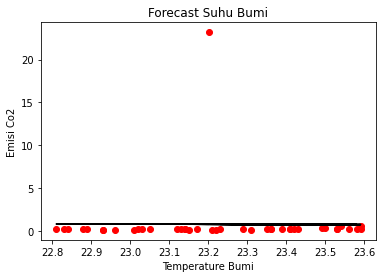

In [137]:
plt.scatter(X_train.values.reshape(-1, 1), y_train, color='red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color='black')
plt.title('Forecast Suhu Bumi')
plt.xlabel('Temperature Bumi')
plt.ylabel('Emisi Co2')
plt.show()

In [138]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 1.62
Residual sum of squares (MSE): 24.31
R2-score: -79544.54


In [139]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='softmax'))

In [140]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00

Epoch 57/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.00

# Singapore

In [250]:
df_sg = pd.read_csv('Temperatur_of_SG.csv')
df_sg

,Category,Annual Mean,5-yr smooth,Singapore
0,1901.0,26.59,26.67,NaN
1,1902.0,26.53,26.59,NaN
2,1903.0,26.55,26.51,NaN
3,1904.0,26.56,26.46,NaN
4,1905.0,26.60,26.44,NaN
...,...,...,...,...
1032249,NaN,NaN,NaN,8.13
1032250,NaN,NaN,NaN,8.22
1032251,NaN,NaN,NaN,8.23
1032252,NaN,NaN,NaN,8.45


In [251]:
df_sg = pd.read_csv('Temperatur_of_SG.csv')
df_sg

,Category,Annual Mean,5-yr smooth,Singapore
0,1901.0,26.59,26.67,NaN
1,1902.0,26.53,26.59,NaN
2,1903.0,26.55,26.51,NaN
3,1904.0,26.56,26.46,NaN
4,1905.0,26.60,26.44,NaN
...,...,...,...,...
1032249,NaN,NaN,NaN,8.13
1032250,NaN,NaN,NaN,8.22
1032251,NaN,NaN,NaN,8.23
1032252,NaN,NaN,NaN,8.45


In [252]:
df_sg.describe(include='all')

,Category,Annual Mean,5-yr smooth,Singapore
count,120.000000,120.000000,120.000000,3776.000000
mean,1960.500000,27.039000,27.038667,8.851525
std,34.785054,0.440325,0.391206,3.684633
min,1901.000000,26.320000,26.440000,0.350000
25%,1930.750000,26.680000,26.692500,8.130000
50%,1960.500000,26.975000,26.995000,9.680000
75%,1990.250000,27.340000,27.212500,11.240000
max,2020.000000,28.120000,27.930000,15.160000


In [253]:
df_sg.dtypes

Category       float64
Annual Mean    float64
5-yr smooth    float64
Singapore      float64
dtype: object

In [254]:
df_sg.Singapore.dtypes

dtype('float64')

In [255]:
df_sg.isna().sum()

Category       1032134
Annual Mean    1032134
5-yr smooth    1032134
Singapore      1028478
dtype: int64

In [256]:
singapore = df_sg.dropna(axis=0)
singapore

,Category,Annual Mean,5-yr smooth,Singapore
59,1960.0,26.76,26.67,0.85
60,1961.0,26.60,26.63,1.23
61,1962.0,26.49,26.60,1.47
62,1963.0,26.68,26.57,1.89
63,1964.0,26.58,26.57,2.01
64,1965.0,26.51,26.59,1.34
65,1966.0,26.68,26.62,0.35
66,1967.0,26.44,26.64,1.55
67,1968.0,26.54,26.65,2.69
68,1969.0,26.80,26.63,3.53


### Cek Missing Value

In [257]:
df_sg.isna()

,Category,Annual Mean,5-yr smooth,Singapore
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
1032249,True,True,True,False
1032250,True,True,True,False
1032251,True,True,True,False
1032252,True,True,True,False


### Melihat Korelasi

In [258]:
import seaborn as sns

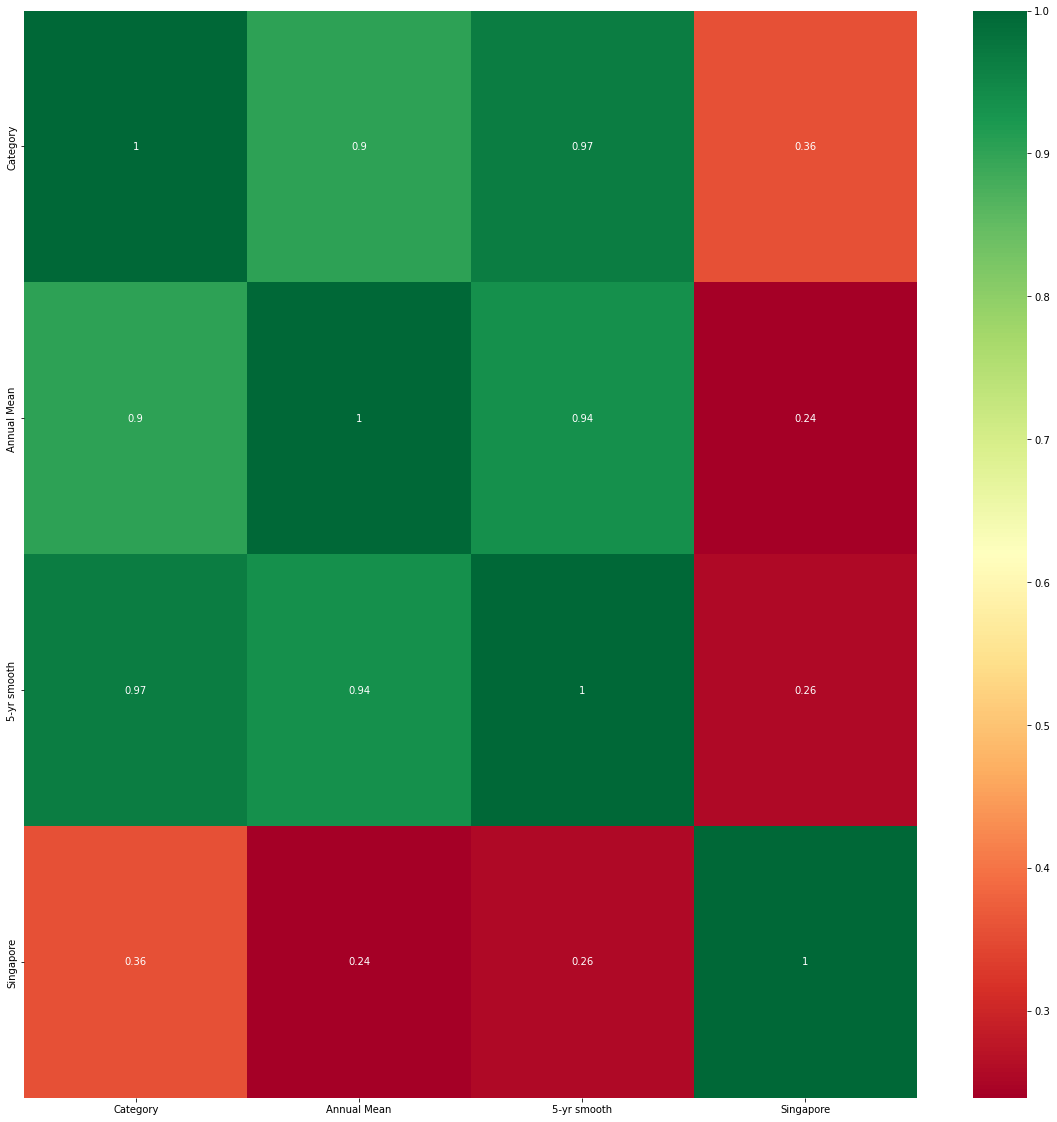

In [259]:
X = singapore.iloc[:,1:4]
y = singapore.iloc[:,0]

# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = singapore.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heatmap
h = sns.heatmap(singapore[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Data Cleansing & Handling Missing Value

In [260]:
# import library pandas
import pandas as pd

# import library numpy
import numpy as np

# import library matplotlib
import matplotlib.pyplot as plt

# import library seaborn
import seaborn as sns

# me non aktifkan peringatan pada python dengan import warning -> 'ignore'
import warnings
warnings.filterwarnings('ignore') 

In [261]:
df_sg.isna().sum()

Category       1032134
Annual Mean    1032134
5-yr smooth    1032134
Singapore      1028478
dtype: int64

In [262]:
df_sg['Annual Mean'].describe()

count    120.000000
mean      27.039000
std        0.440325
min       26.320000
25%       26.680000
50%       26.975000
75%       27.340000
max       28.120000
Name: Annual Mean, dtype: float64

In [263]:
df_sg['5-yr smooth'].describe()

count    120.000000
mean      27.038667
std        0.391206
min       26.440000
25%       26.692500
50%       26.995000
75%       27.212500
max       27.930000
Name: 5-yr smooth, dtype: float64

In [264]:
df_sg['Singapore'].describe()

count    3776.000000
mean        8.851525
std         3.684633
min         0.350000
25%         8.130000
50%         9.680000
75%        11.240000
max        15.160000
Name: Singapore, dtype: float64

In [265]:
print('Nilai NaN pada kolom SepalLengthCm berjumlah :', df_sg['Annual Mean'].isnull().values.sum())

Nilai NaN pada kolom SepalLengthCm berjumlah : 1032134


In [266]:
print('Nilai NaN pada kolom SepalLengthCm berjumlah :', df_sg['5-yr smooth'].isnull().values.sum())

Nilai NaN pada kolom SepalLengthCm berjumlah : 1032134


In [267]:
print('Nilai NaN pada kolom SepalLengthCm berjumlah :', df_sg['Singapore'].isnull().values.sum())

Nilai NaN pada kolom SepalLengthCm berjumlah : 1028478


### Melihat Outlier

In [268]:
def detect_outliers(df_sg, x):
    Q1 = df_sg[x].describe()['25%']
    Q3 = df_sg[x].describe()['75%']
    IQR = Q3-Q1
    return df_sg[(df_sg[x] < Q1-1.5*IQR) | (df_sg[x] > Q3+1.5*IQR)]

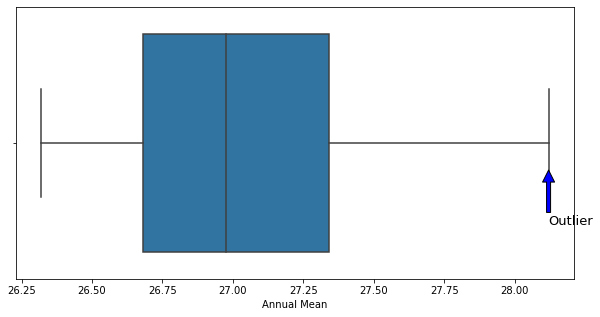

In [269]:
plt.figure(figsize = (10, 5))
sns.boxplot(df_sg['Annual Mean'])
plt.annotate('Outlier', (df_sg['Annual Mean'].describe()['max'],0.1), xytext = (df_sg['Annual Mean'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df_sg['Annual Mean'].describe()['75%'] - df_sg['Annual Mean'].describe()['25%']

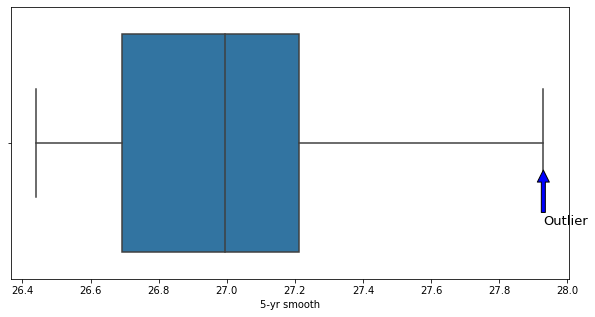

In [270]:
plt.figure(figsize = (10, 5))
sns.boxplot(df_sg['5-yr smooth'])
plt.annotate('Outlier', (df_sg['5-yr smooth'].describe()['max'],0.1), xytext = (df_sg['5-yr smooth'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df_sg['5-yr smooth'].describe()['75%'] - df_sg['5-yr smooth'].describe()['25%']

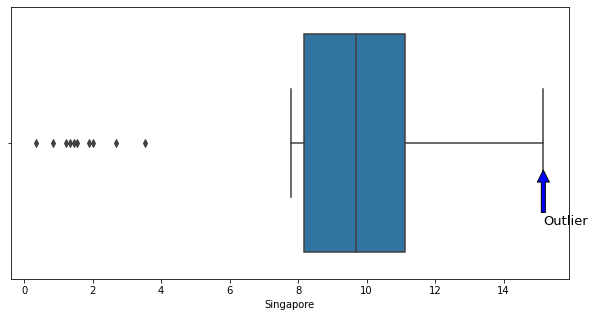

In [271]:
plt.figure(figsize = (10, 5))
sns.boxplot(singapore['Singapore'])
plt.annotate('Outlier', (df_sg['Singapore'].describe()['max'],0.1), xytext = (df_sg['Singapore'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df_sg['Singapore'].describe()['75%'] - df_sg['Singapore'].describe()['25%']

In [272]:
detect_outliers(df_sg,'Singapore')

,Category,Annual Mean,5-yr smooth,Singapore
59,1960.0,26.76,26.67,0.85
60,1961.0,26.60,26.63,1.23
61,1962.0,26.49,26.60,1.47
62,1963.0,26.68,26.57,1.89
63,1964.0,26.58,26.57,2.01
...,...,...,...,...
1032199,NaN,NaN,NaN,2.01
1032200,NaN,NaN,NaN,1.34
1032201,NaN,NaN,NaN,0.35
1032202,NaN,NaN,NaN,1.55


### Periksa Data Bernilai Minus

In [273]:
df_sg[df_sg['Annual Mean']<1]

,Category,Annual Mean,5-yr smooth,Singapore


In [274]:
df_sg[df_sg['5-yr smooth']<1]

,Category,Annual Mean,5-yr smooth,Singapore


In [275]:
df_sg[df_sg['Singapore']<1]

,Category,Annual Mean,5-yr smooth,Singapore
59,1960.0,26.76,26.67,0.85
65,1966.0,26.68,26.62,0.35
16387,NaN,NaN,NaN,0.85
16393,NaN,NaN,NaN,0.35
32771,NaN,NaN,NaN,0.85
...,...,...,...,...
999433,NaN,NaN,NaN,0.35
1015811,NaN,NaN,NaN,0.85
1015817,NaN,NaN,NaN,0.35
1032195,NaN,NaN,NaN,0.85


### Linear Regresion

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import numpy as np

In [279]:
X = singapore.iloc[:,2]
y = singapore.iloc[:,3]

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [281]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("X valid shape: ", X_valid.shape)

X train shape:  (41,)
X test shape:  (21,)
X valid shape:  (20,)


In [282]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

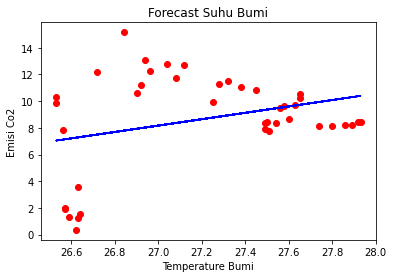

In [283]:
plt.scatter(X_train.values.reshape(-1, 1), y_train, color='red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Forecast Suhu Bumi')
plt.xlabel('Temperature Bumi')
plt.ylabel('Emisi Co2')
plt.show()

In [284]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 3.30
Residual sum of squares (MSE): 14.80
R2-score: -10.56


In [285]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='softmax'))

In [286]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1/1 [==============================] - 0s 369ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00

Epoch 57/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 58/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 59/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 60/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 61/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 62/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 63/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.00